In [1]:
import pandas as pd
import numpy as np
import utilities as utls
import dataUtils as dutls
import model_utils as mutls
import matplotlib.pyplot as plt

C:\Users\Yang\.conda\envs\test_speedcom\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [17]:
df=pd.read_csv('cleaned_data_emission.tsv',sep='\t')

In [20]:
prop = utls.compute_properties(df, 'SMILES')

In [21]:
df_prop=pd.concat([df, prop],axis=1)

In [14]:
df_prop.head()

,#,Name,Epsilon,Solvent,Quantum Yield,Solvent.1,File,File.1,Absorption,SMILES,...,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumSpiroAtoms,NumBridgeheadAtoms,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters,labuteASA,tpsa,CrippenClogP,CrippenMR
0,1,Benzene,210,cyclohexane,0.053,hexane,A01_71-43-2_Benzene.abs.txt,A01_71-43-2_Benzene.ems.txt,254.75,C1=CC=CC=C1,...,0.0,0.0,0.0,0.0,0.0,0.0,37.431403,0.0,1.68660,26.442
1,2,Toluene,2860,cyclohexane,0.170,cyclohexane,A02_108-88-3_Toluene.abs.txt,A02_108-88-3_Toluene.ems.txt,261.75,CC1=CC=CC=C1,...,0.0,0.0,0.0,0.0,0.0,0.0,43.796345,0.0,1.99502,31.179
2,3,o-Xylene,254,cyclohexane,0.170,hexane,A03_95-47-6_o-Xylene.abs.txt,A03_95-47-6_o-Xylene.ems.txt,263.00,CC1=CC=CC=C1C,...,0.0,0.0,0.0,0.0,0.0,0.0,50.161287,0.0,2.30344,35.916
3,4,m-Xylene,284,cyclohexane,0.130,hexane,A04_108-38-3_m-Xylene.abs.txt,A04_108-38-3_m-Xylene.ems.txt,265.00,CC1=CC(=CC=C1)C,...,0.0,0.0,0.0,0.0,0.0,0.0,50.161287,0.0,2.30344,35.916
4,5,p-Xylene,770,cyclohexane,0.220,hexane,A05_106-42-3_p-Xylene.abs.txt,A05_106-42-3_p-Xylene.ems.txt,275.00,CC1=CC=C(C=C1)C,...,0.0,0.0,0.0,0.0,0.0,0.0,50.161287,0.0,2.30344,35.916


In [32]:
df_prop=df_prop[['#', 'Name', 'SMILES','Epsilon', 'Solvent','Absorption', 'Quantum Yield', 'Emission','Solvent.1', 'exactmw', 'lipinskiHBA',
       'lipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA',
       'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings',
       'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings',
       'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters',
       'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP',
       'CrippenMR']]

In [33]:
df_prop.to_csv('smiles_property.tsv', sep = '\t', index=False)

### FILL 0 for NA in Emission and Quantum Yield

In [49]:
df_prop['Emission'].fillna(0, inplace=True)
df_prop['Quantum Yield'].fillna(0, inplace=True)

In [51]:
import seaborn as sns
sns.set(style="ticks")

In [52]:
df_sample = df_prop.sample(frac=0.3)

In [53]:
df_sample.columns

Index(['#', 'Name', 'SMILES', 'Epsilon', 'Solvent', 'Absorption',
       'Quantum Yield', 'Emission', 'Solvent.1', 'exactmw', 'lipinskiHBA',
       'lipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA',
       'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings',
       'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings',
       'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters',
       'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP',
       'CrippenMR'],
      dtype='object')

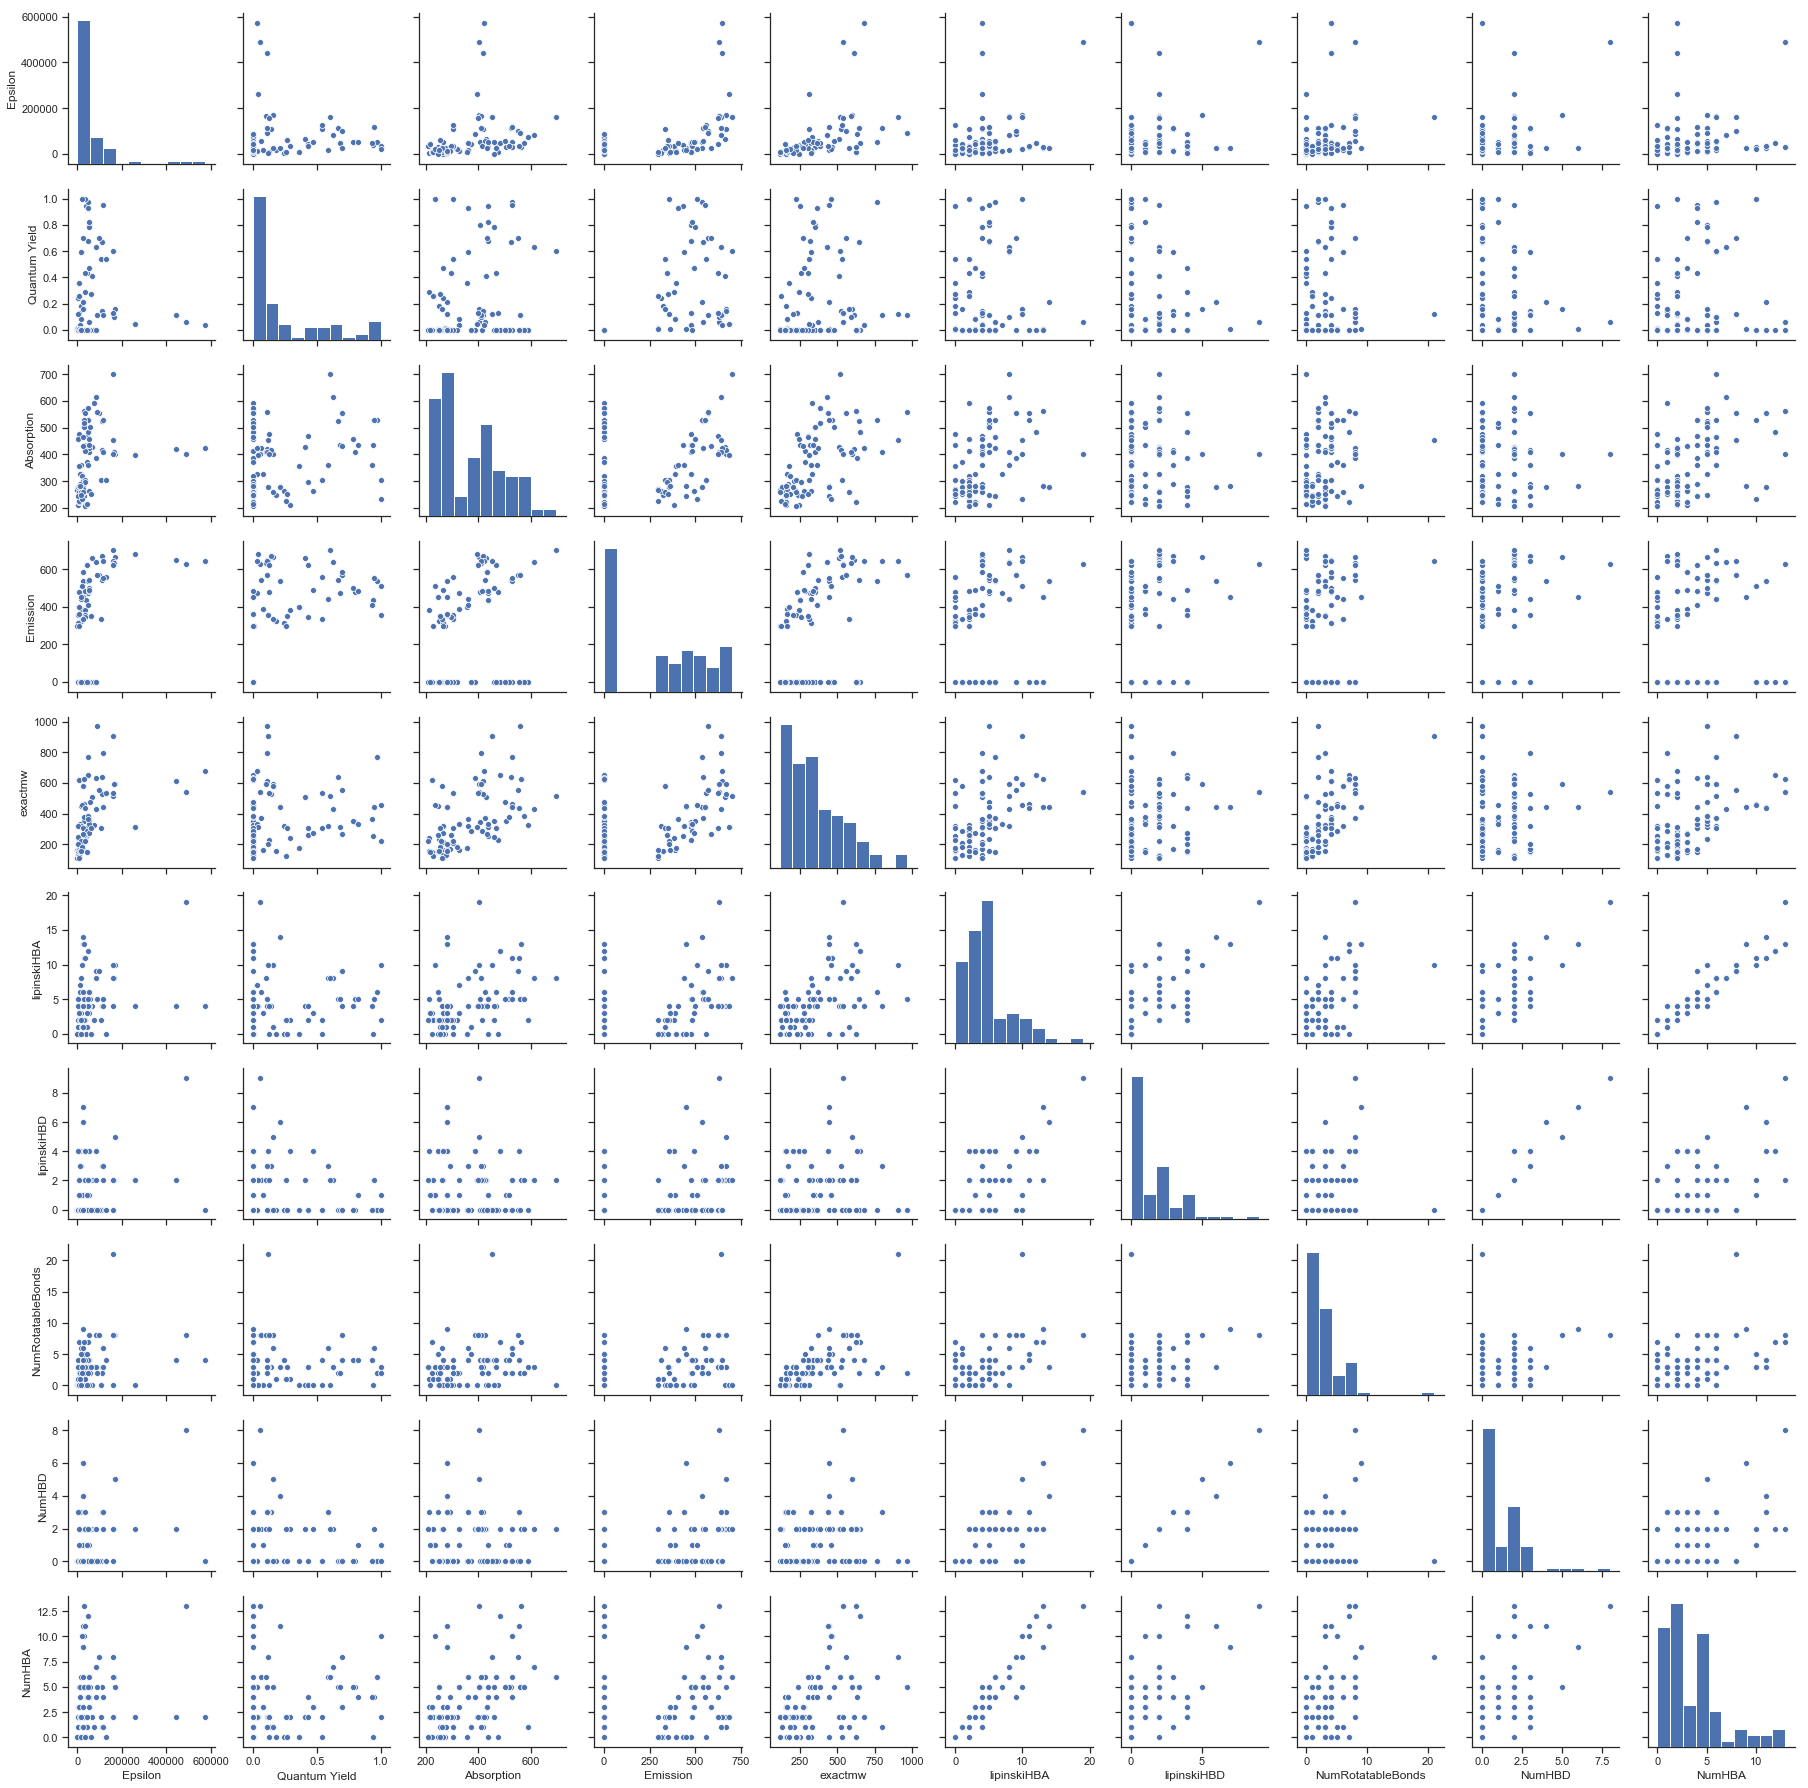

In [54]:
sns.pairplot(df_sample, vars=['Epsilon', 'Quantum Yield','Absorption', 'Emission', 'exactmw', 'lipinskiHBA',
       'lipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA' ])

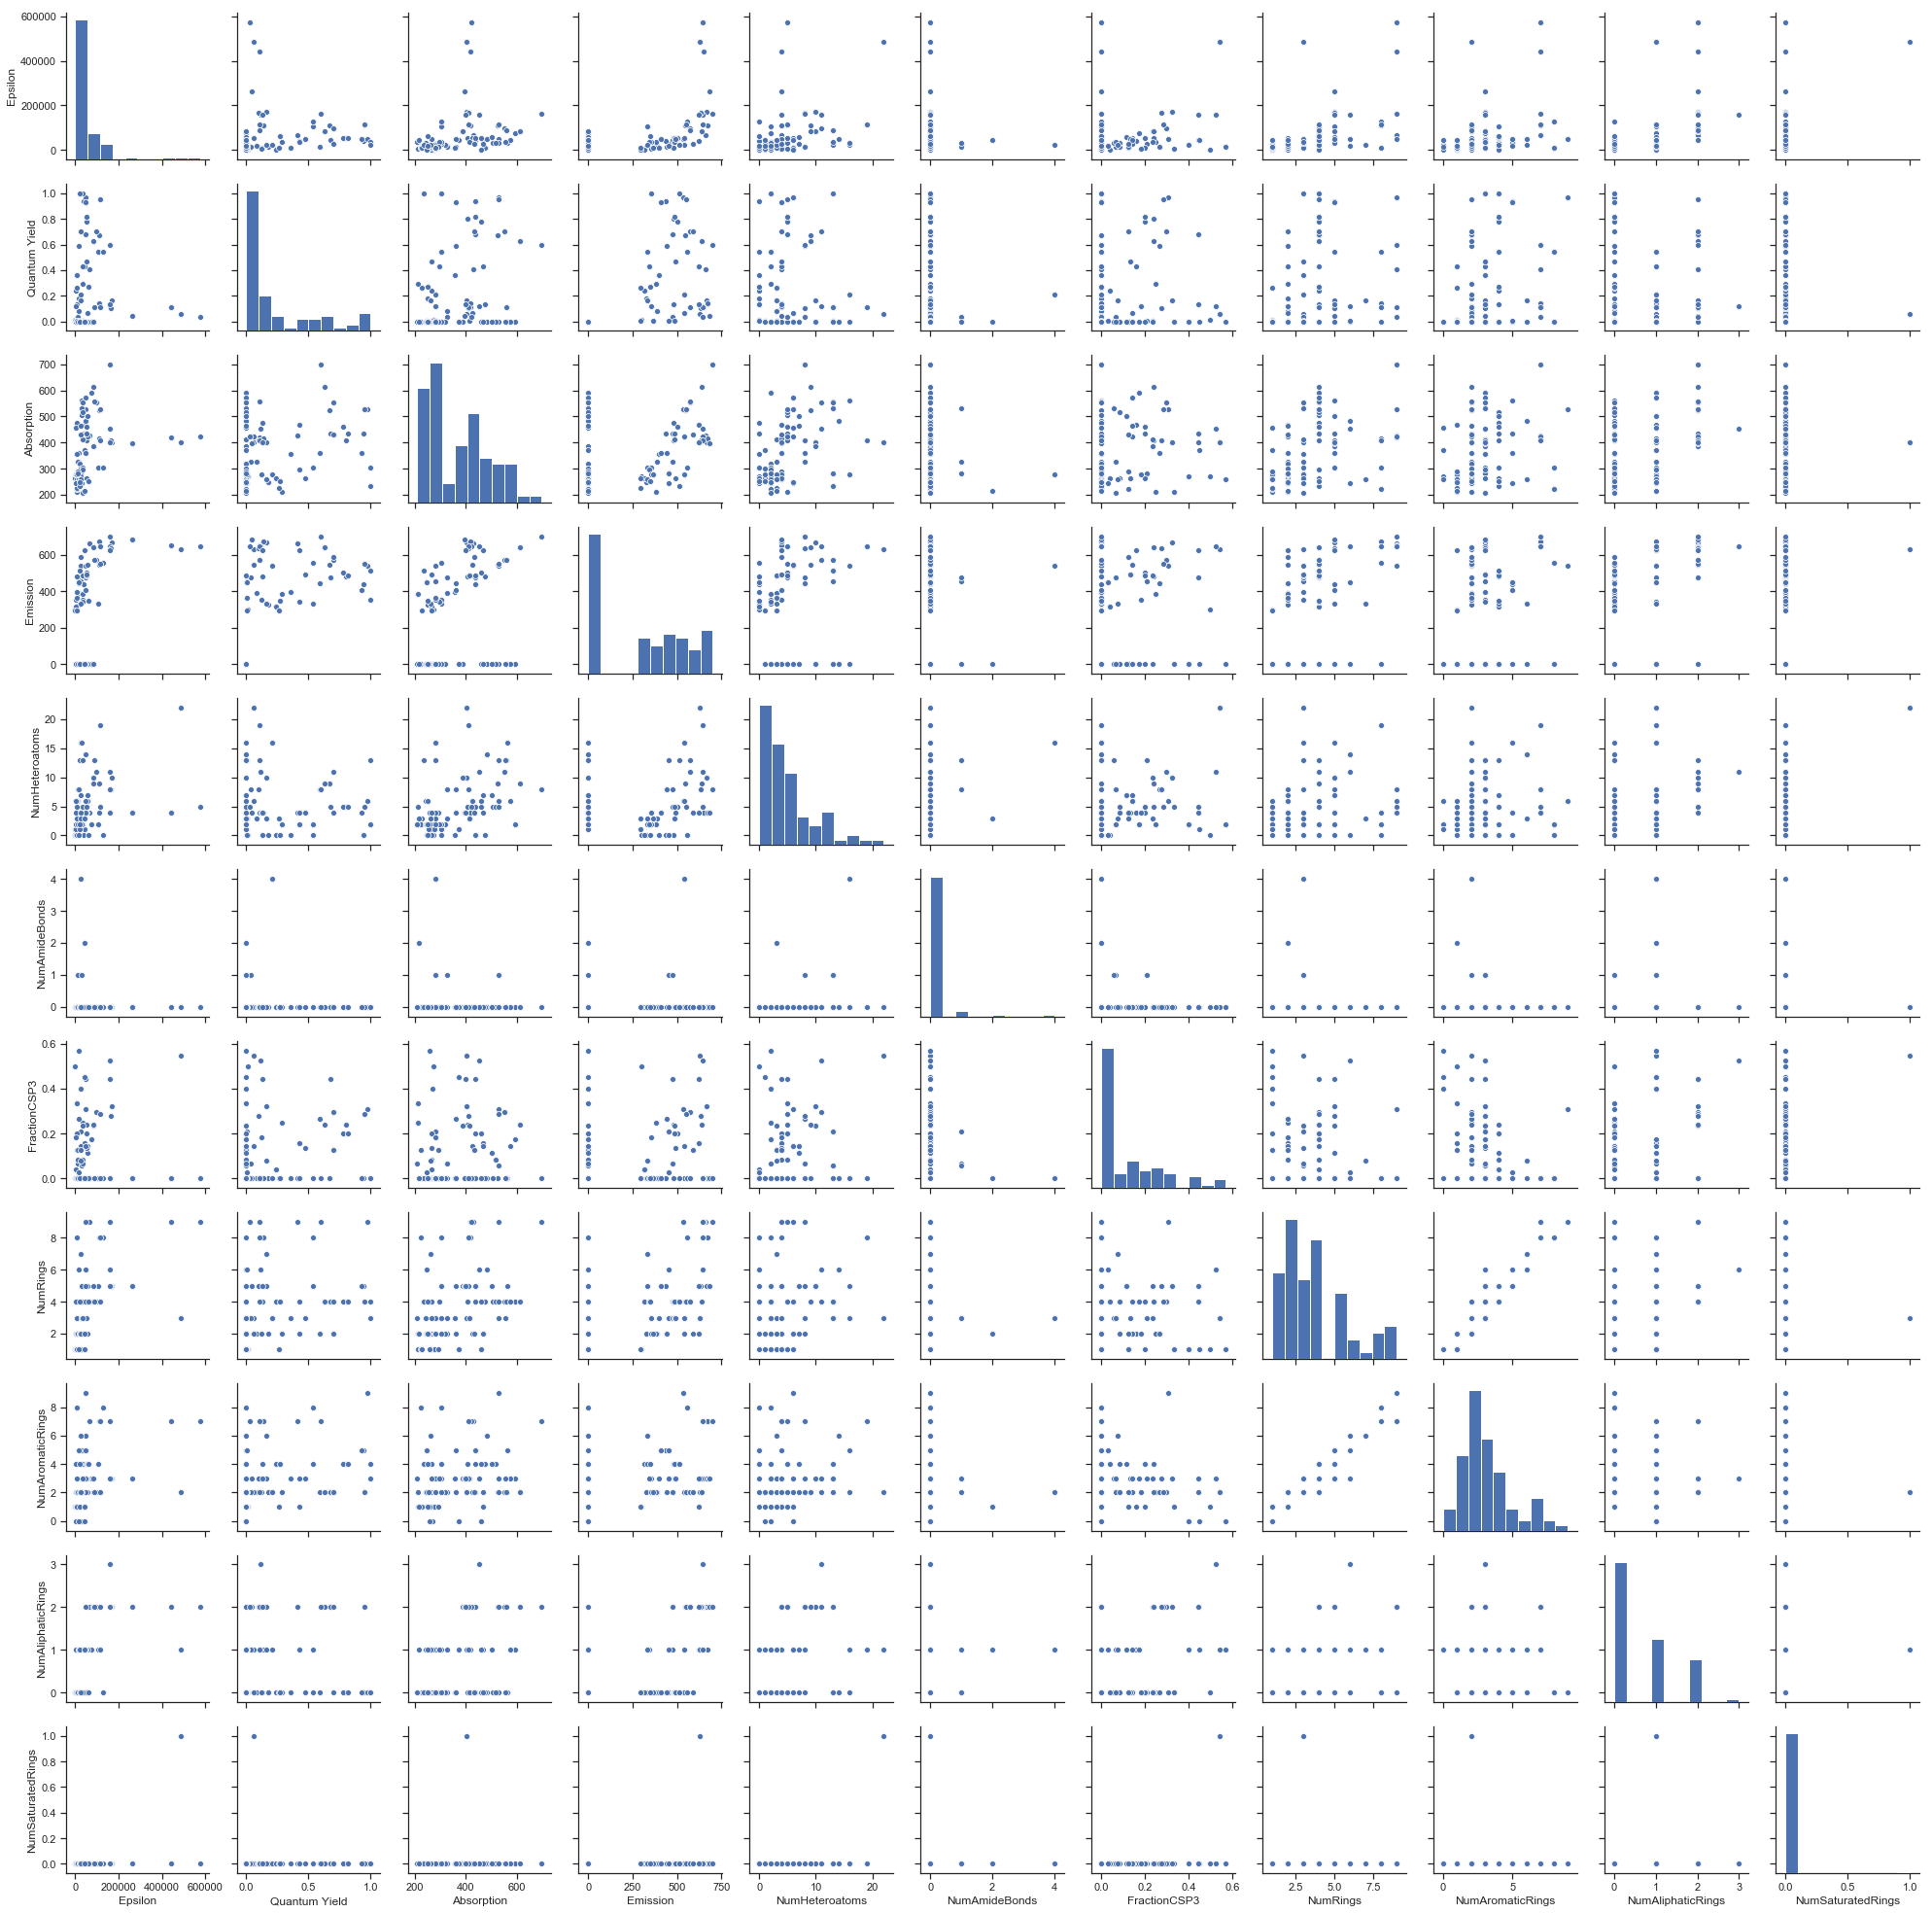

In [57]:
sns.pairplot(df_sample, vars=['Epsilon', 'Quantum Yield','Absorption', 'Emission','NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings',
       'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings'])

'NumSaturatedRings', No correlation  
'NumAliphaticRings'  
['NumAromaticRings','NumRings'] have dependency and should only take Aromatic ring


'NumAmideBonds' should drop, no correlation shown, mostly 0

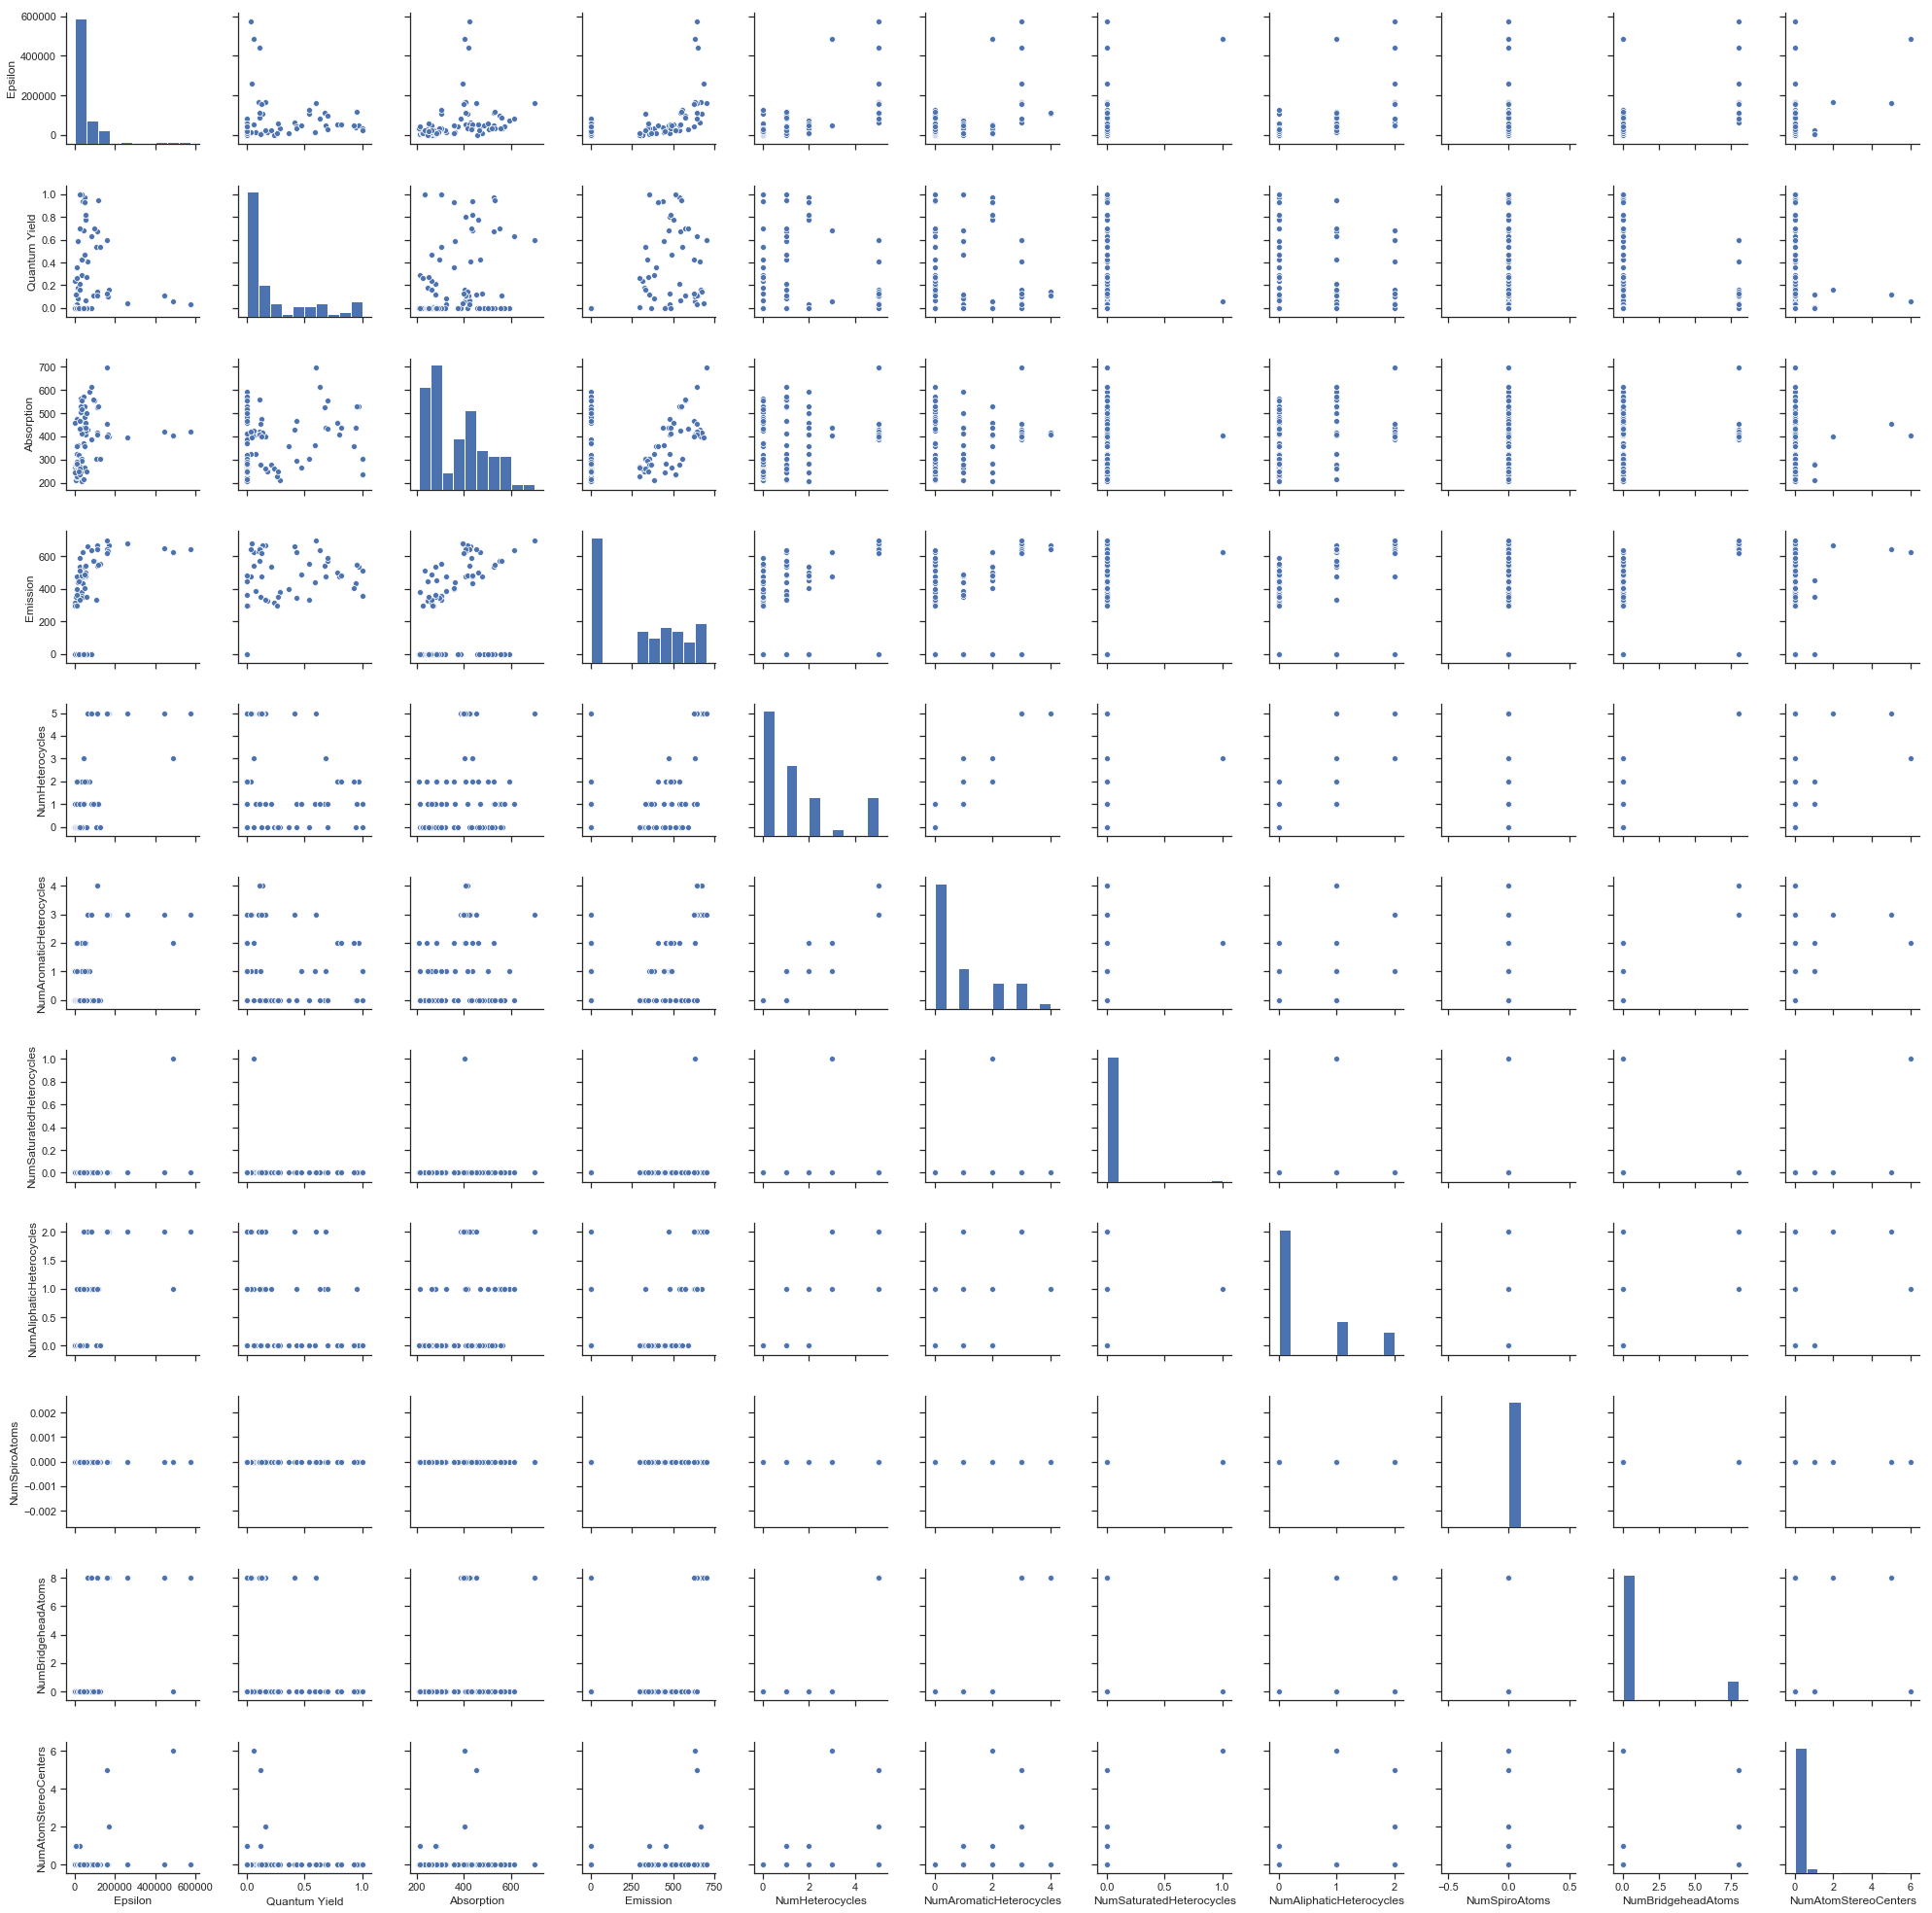

In [62]:
sns.pairplot(df_sample, vars=['Epsilon', 'Quantum Yield','Absorption', 'Emission','NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters'])

Should DROP 'NumSaturatedHeterocycles', 'NumSpiroAtoms' since only value 0


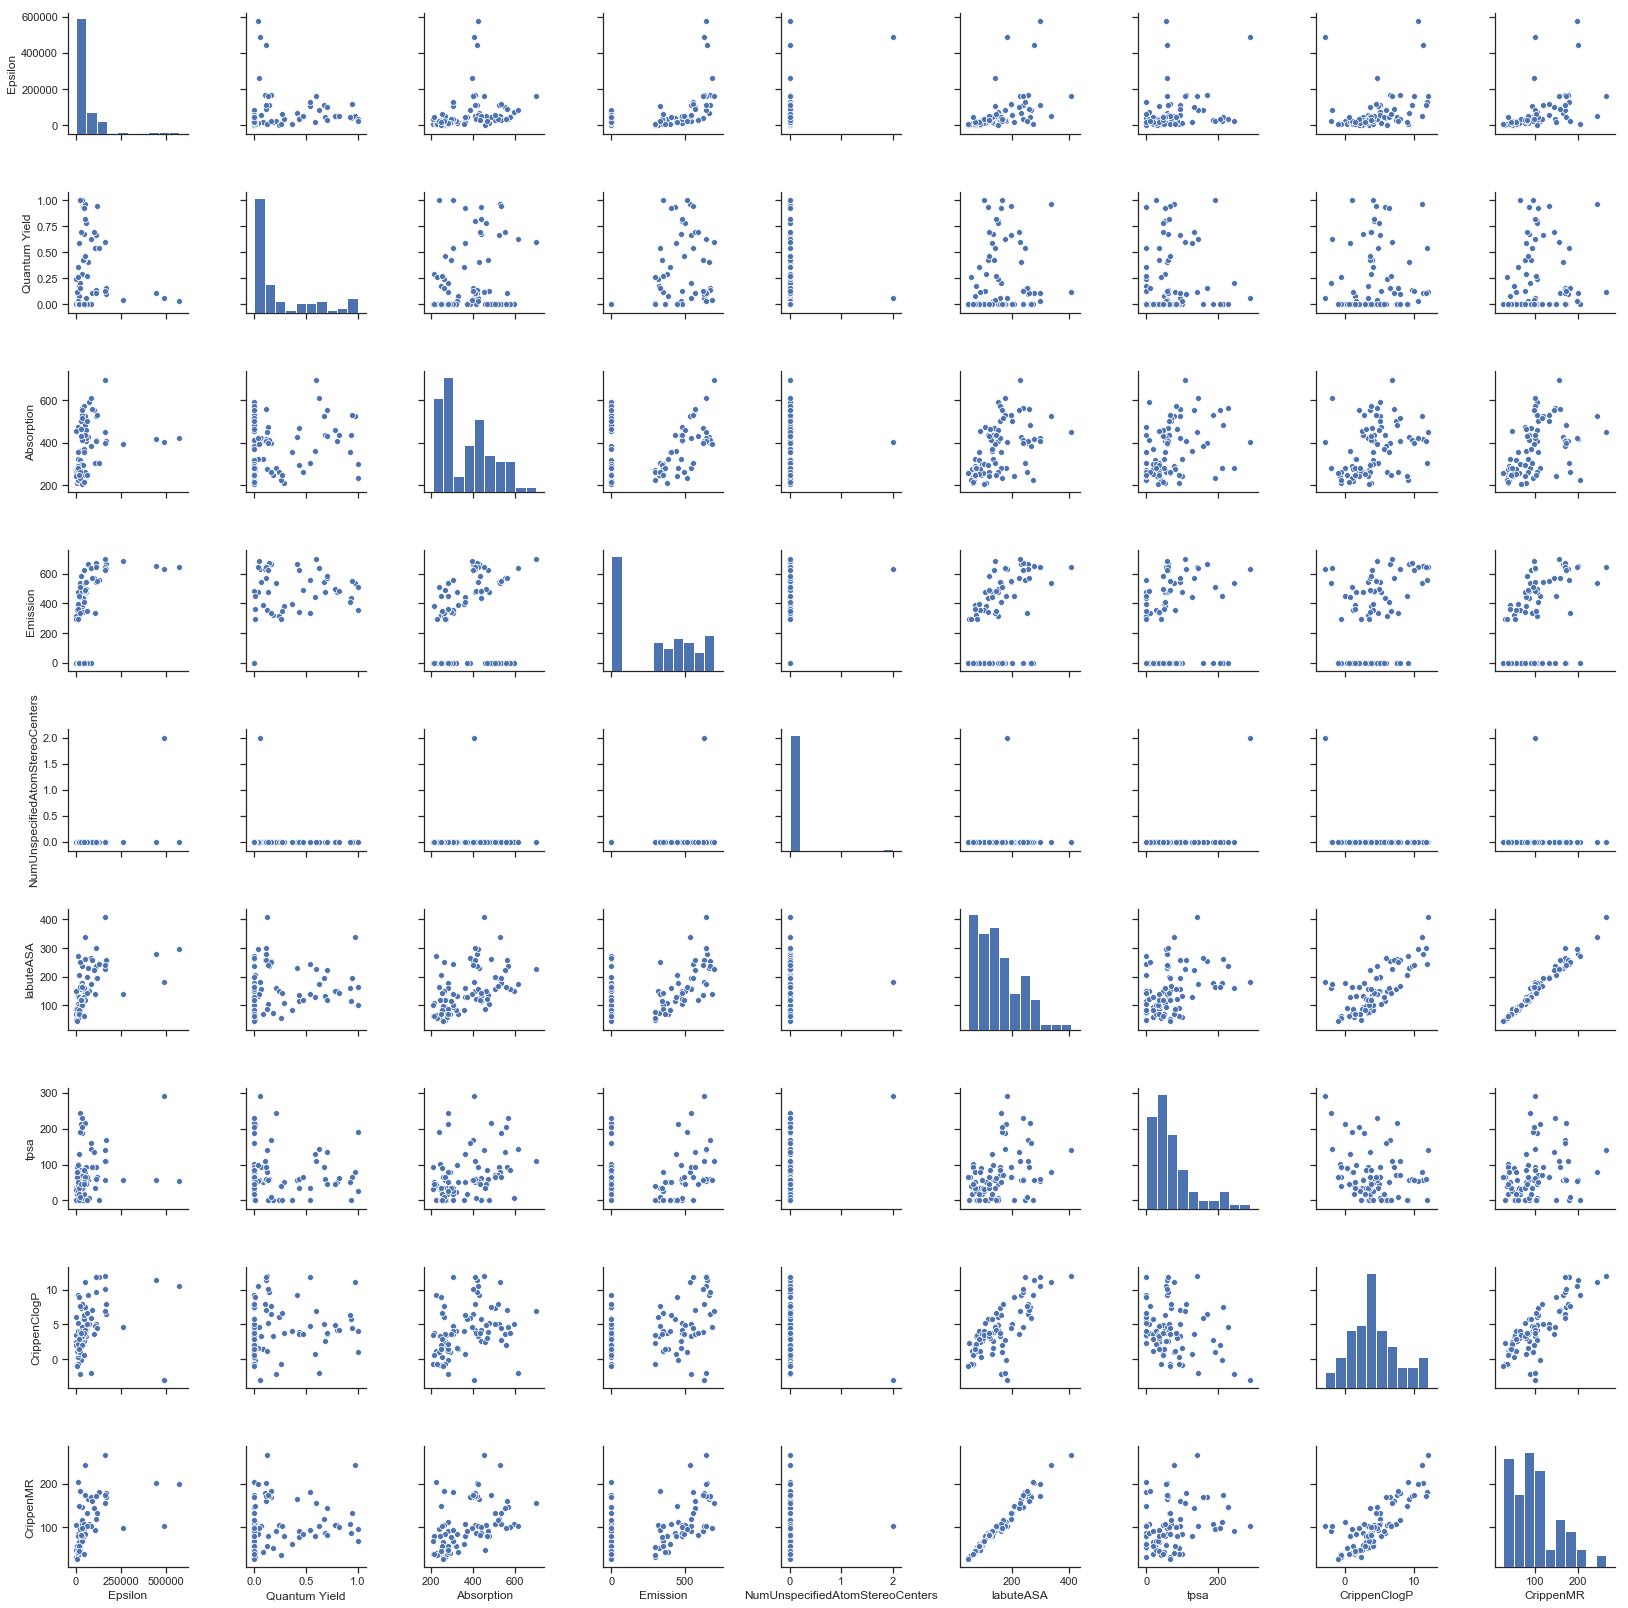

In [63]:
sns.pairplot(df_sample, vars=['Epsilon', 'Quantum Yield','Absorption', 'Emission',
       'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP',
       'CrippenMR'])

drop 'NumUnspecifiedAtomStereoCenters'

### Try first NN

In [64]:
y_wl = df_prop[df_sample.columns[5]].values

In [67]:
X = df_prop[df_sample.columns[9:]].drop(['NumAmideBonds','NumSaturatedRings','NumHeterocycles',
       'NumSaturatedHeterocycles','NumSpiroAtoms','NumUnspecifiedAtomStereoCenters'],axis=1).values

(291, 19)

In [70]:
X_train, X_test, y_train, y_test = dutls.DataUtils.splitData(X,y_wl,0.2)

In [109]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [110]:
y_train.shape

(232, 1)

In [83]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [72]:
from keras import regularizers
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation

Using TensorFlow backend.


In [92]:
model = Sequential()

model.add(Dense(400, input_shape=(19,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 400)               8000      
_________________________________________________________________
batch_normalization_5 (Batch (None, 400)               1600      
_________________________________________________________________
activation_4 (Activation)    (None, 400)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_22 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 100)               20100     
__________

In [93]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=[coeff_determination])
history = model.fit(X_train, y_train, batch_size=32, epochs=300, validation_data=[X_test, y_test])


Train on 232 samples, validate on 59 samples
Epoch 1/300
232/232 [==============================] - 1s 5ms/step - loss: 157357.4170 - coeff_determination: -7.1744 - val_loss: 161308.5347 - val_coeff_determination: -6.6564
Epoch 2/300
232/232 [==============================] - 0s 217us/step - loss: 152712.0269 - coeff_determination: -7.0286 - val_loss: 151389.7169 - val_coeff_determination: -6.1837
Epoch 3/300
232/232 [==============================] - 0s 168us/step - loss: 137809.6285 - coeff_determination: -6.5224 - val_loss: 119944.2903 - val_coeff_determination: -4.6854
Epoch 4/300
232/232 [==============================] - 0s 215us/step - loss: 107502.6818 - coeff_determination: -5.2223 - val_loss: 60309.0988 - val_coeff_determination: -1.8372
Epoch 5/300
232/232 [==============================] - 0s 180us/step - loss: 68794.1094 - coeff_determination: -2.4629 - val_loss: 47084.8404 - val_coeff_determination: -1.1940
Epoch 6/300
232/232 [==============================] - 0s 215us/s

Epoch 47/300
232/232 [==============================] - 0s 292us/step - loss: 20805.5118 - coeff_determination: -0.0869 - val_loss: 13400.3134 - val_coeff_determination: 0.3910
Epoch 48/300
232/232 [==============================] - 0s 232us/step - loss: 22651.9085 - coeff_determination: -0.2450 - val_loss: 13977.1474 - val_coeff_determination: 0.3610
Epoch 49/300
232/232 [==============================] - 0s 258us/step - loss: 21551.1928 - coeff_determination: -0.0915 - val_loss: 16543.7121 - val_coeff_determination: 0.2363
Epoch 50/300
232/232 [==============================] - 0s 224us/step - loss: 22319.7883 - coeff_determination: -0.1481 - val_loss: 23393.0056 - val_coeff_determination: -0.0861
Epoch 51/300
232/232 [==============================] - 0s 241us/step - loss: 20474.4748 - coeff_determination: -0.0619 - val_loss: 14749.3725 - val_coeff_determination: 0.3227
Epoch 52/300
232/232 [==============================] - 0s 241us/step - loss: 20964.6613 - coeff_determination: -0

232/232 [==============================] - 0s 172us/step - loss: 15898.6847 - coeff_determination: 0.1868 - val_loss: 12728.5223 - val_coeff_determination: 0.4177
Epoch 94/300
232/232 [==============================] - 0s 181us/step - loss: 16985.6132 - coeff_determination: 0.1316 - val_loss: 16658.5454 - val_coeff_determination: 0.2320
Epoch 95/300
232/232 [==============================] - 0s 150us/step - loss: 16339.4078 - coeff_determination: 0.0551 - val_loss: 26249.6084 - val_coeff_determination: -0.2161
Epoch 96/300
232/232 [==============================] - 0s 193us/step - loss: 20798.0128 - coeff_determination: -0.0710 - val_loss: 12870.0625 - val_coeff_determination: 0.4141
Epoch 97/300
232/232 [==============================] - 0s 228us/step - loss: 15046.9333 - coeff_determination: 0.2357 - val_loss: 11720.7188 - val_coeff_determination: 0.4679
Epoch 98/300
232/232 [==============================] - 0s 224us/step - loss: 15308.5341 - coeff_determination: 0.2270 - val_loss: 

232/232 [==============================] - 0s 245us/step - loss: 15242.2716 - coeff_determination: 0.2076 - val_loss: 10967.0267 - val_coeff_determination: 0.5032
Epoch 140/300
232/232 [==============================] - 0s 267us/step - loss: 18090.2203 - coeff_determination: 0.0274 - val_loss: 15625.5162 - val_coeff_determination: 0.2848
Epoch 141/300
232/232 [==============================] - 0s 254us/step - loss: 13099.6067 - coeff_determination: 0.2610 - val_loss: 10653.8886 - val_coeff_determination: 0.5162
Epoch 142/300
232/232 [==============================] - 0s 241us/step - loss: 17874.6689 - coeff_determination: 0.0816 - val_loss: 11438.1092 - val_coeff_determination: 0.4778
Epoch 143/300
232/232 [==============================] - 0s 249us/step - loss: 13045.3208 - coeff_determination: 0.3472 - val_loss: 10389.1170 - val_coeff_determination: 0.5251
Epoch 144/300
232/232 [==============================] - 0s 211us/step - loss: 18972.3252 - coeff_determination: 0.0608 - val_los

232/232 [==============================] - 0s 275us/step - loss: 14097.8345 - coeff_determination: 0.2708 - val_loss: 13058.1899 - val_coeff_determination: 0.3942
Epoch 186/300
232/232 [==============================] - 0s 228us/step - loss: 15990.8226 - coeff_determination: 0.1999 - val_loss: 11718.2230 - val_coeff_determination: 0.4595
Epoch 187/300
232/232 [==============================] - 0s 211us/step - loss: 14145.3054 - coeff_determination: 0.2607 - val_loss: 14514.1129 - val_coeff_determination: 0.3356
Epoch 188/300
232/232 [==============================] - 0s 215us/step - loss: 15418.0388 - coeff_determination: 0.2182 - val_loss: 12016.6601 - val_coeff_determination: 0.4525
Epoch 189/300
232/232 [==============================] - 0s 224us/step - loss: 13083.2014 - coeff_determination: 0.3182 - val_loss: 12691.6305 - val_coeff_determination: 0.4237
Epoch 190/300
232/232 [==============================] - 0s 215us/step - loss: 15514.7825 - coeff_determination: 0.2153 - val_los

232/232 [==============================] - 0s 163us/step - loss: 17132.4383 - coeff_determination: 0.1498 - val_loss: 11094.7289 - val_coeff_determination: 0.4931
Epoch 232/300
232/232 [==============================] - 0s 202us/step - loss: 13302.5487 - coeff_determination: 0.3198 - val_loss: 11806.8210 - val_coeff_determination: 0.4604
Epoch 233/300
232/232 [==============================] - 0s 211us/step - loss: 14517.0513 - coeff_determination: 0.2021 - val_loss: 10242.3182 - val_coeff_determination: 0.5310
Epoch 234/300
232/232 [==============================] - 0s 198us/step - loss: 16251.0342 - coeff_determination: 0.1788 - val_loss: 9735.8172 - val_coeff_determination: 0.5518
Epoch 235/300
232/232 [==============================] - 0s 219us/step - loss: 14061.6021 - coeff_determination: 0.2514 - val_loss: 9708.9392 - val_coeff_determination: 0.5540
Epoch 236/300
232/232 [==============================] - 0s 232us/step - loss: 15788.6189 - coeff_determination: 0.1392 - val_loss:

232/232 [==============================] - 0s 215us/step - loss: 14760.3324 - coeff_determination: 0.2635 - val_loss: 10706.8312 - val_coeff_determination: 0.5082
Epoch 278/300
232/232 [==============================] - 0s 241us/step - loss: 14490.0078 - coeff_determination: 0.2592 - val_loss: 11318.4037 - val_coeff_determination: 0.4809
Epoch 279/300
232/232 [==============================] - 0s 224us/step - loss: 13985.5009 - coeff_determination: 0.2444 - val_loss: 10935.8854 - val_coeff_determination: 0.4977
Epoch 280/300
232/232 [==============================] - 0s 279us/step - loss: 14151.9506 - coeff_determination: 0.1262 - val_loss: 10640.9353 - val_coeff_determination: 0.5106
Epoch 281/300
232/232 [==============================] - 0s 211us/step - loss: 14446.5801 - coeff_determination: 0.2880 - val_loss: 10708.5411 - val_coeff_determination: 0.5050
Epoch 282/300
232/232 [==============================] - 0s 275us/step - loss: 12885.4207 - coeff_determination: 0.3031 - val_los

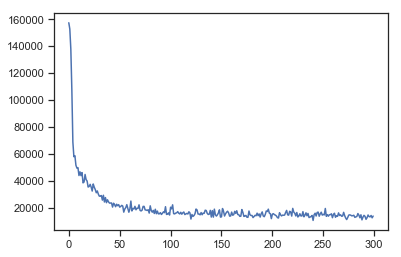

In [94]:
plt.plot(history.epoch, history.history['loss'])

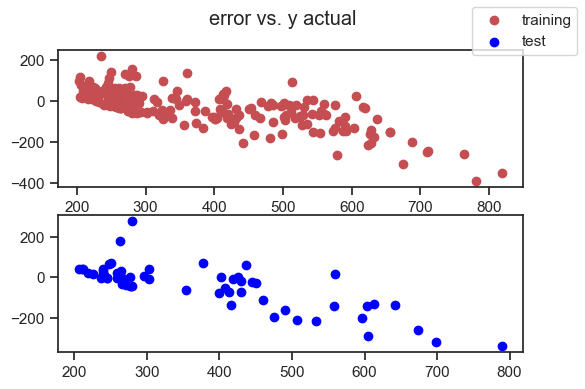

In [95]:
mutls.ModelUtils.plot_model_error(X_train,X_test,y_train,y_test,model)

In [96]:
import sklearn

In [97]:
from sklearn import linear_model

In [98]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

C:\Users\Yang\.conda\envs\test_speedcom\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
print(clf.coef_)

[ -0.10542771  61.60833999  17.25690337  -4.06378766 -17.17229755
   9.68538297  -6.32161931 -39.39079813  -0.         -18.39375319
   0.         -20.44927723  22.7265754  -12.7722366  -37.22289352
   2.06848411  -3.19818392  10.58691193  -1.11344043]


In [100]:
y_pred=clf.predict(X_train)

In [101]:
from sklearn.metrics import mean_absolute_error,r2_score

In [117]:
mean_absolute_error(y_train, y_pred)

70.27774487750119

In [118]:
r2_score(y_train,y_pred)

0.5490296678606691

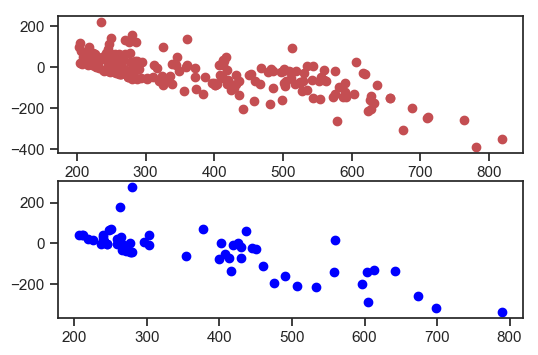

In [116]:
fig, axes = plt.subplots(2)
fig.dpi=100
axes[0].scatter(y_train, model.predict(X_train) - y_train, color = 'r',label='training')
axes[1].scatter(y_test, model.predict(X_test) - y_test, color = 'blue',label = 'test')

#### Pick only 5-6 property as X

In [119]:
X = df_prop[['exactmw','lipinskiHBA','NumHeteroatoms','labuteASA', 'tpsa', 'CrippenClogP','CrippenMR']].values

In [122]:
y_wl = df_prop[df_prop.columns[5]].values

In [123]:
X_train, X_test, y_train, y_test = dutls.DataUtils.splitData(X,y_wl,0.2)

In [124]:
X_train.shape

(232, 7)

In [125]:
model = Sequential()
model.add(Dense(400, input_shape=(7,)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(200, activation='relu'))


model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))


model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))


model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 400)               3200      
_________________________________________________________________
batch_normalization_6 (Batch (None, 400)               1600      
_________________________________________________________________
activation_5 (Activation)    (None, 400)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_27 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               20100     
__________

In [126]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, y_train.reshape(-1,1), batch_size=32, epochs=300, validation_data=[X_test, y_test.reshape(-1,1)])


Train on 232 samples, validate on 59 samples
Epoch 1/300
232/232 [==============================] - 1s 5ms/step - loss: 156164.2425 - mean_absolute_error: 368.5503 - val_loss: 157602.7887 - val_mean_absolute_error: 369.3620
Epoch 2/300
232/232 [==============================] - 0s 225us/step - loss: 146857.5189 - mean_absolute_error: 355.6465 - val_loss: 136946.7852 - val_mean_absolute_error: 341.6051
Epoch 3/300
232/232 [==============================] - 0s 193us/step - loss: 121401.6562 - mean_absolute_error: 317.5063 - val_loss: 81642.7108 - val_mean_absolute_error: 242.9529
Epoch 4/300
232/232 [==============================] - 0s 215us/step - loss: 72873.8688 - mean_absolute_error: 216.3440 - val_loss: 59584.1412 - val_mean_absolute_error: 191.3364
Epoch 5/300
232/232 [==============================] - 0s 224us/step - loss: 66336.6895 - mean_absolute_error: 194.4280 - val_loss: 46533.1802 - val_mean_absolute_error: 172.8820
Epoch 6/300
232/232 [==============================] - 0s

232/232 [==============================] - 0s 176us/step - loss: 28092.4412 - mean_absolute_error: 126.8443 - val_loss: 22088.8093 - val_mean_absolute_error: 114.6198
Epoch 47/300
232/232 [==============================] - 0s 142us/step - loss: 20720.3514 - mean_absolute_error: 109.0227 - val_loss: 80599.1433 - val_mean_absolute_error: 217.6137
Epoch 48/300
232/232 [==============================] - 0s 228us/step - loss: 19199.0071 - mean_absolute_error: 105.8283 - val_loss: 34038.2475 - val_mean_absolute_error: 138.9168
Epoch 49/300
232/232 [==============================] - 0s 185us/step - loss: 21240.2965 - mean_absolute_error: 109.2059 - val_loss: 42307.5143 - val_mean_absolute_error: 152.2322
Epoch 50/300
232/232 [==============================] - 0s 241us/step - loss: 17538.6744 - mean_absolute_error: 95.9816 - val_loss: 45030.4002 - val_mean_absolute_error: 160.0833
Epoch 51/300
232/232 [==============================] - 0s 185us/step - loss: 20844.0286 - mean_absolute_error: 11

232/232 [==============================] - 0s 211us/step - loss: 18677.6649 - mean_absolute_error: 101.4021 - val_loss: 17433.8082 - val_mean_absolute_error: 89.5591
Epoch 92/300
232/232 [==============================] - 0s 150us/step - loss: 17997.3495 - mean_absolute_error: 98.0121 - val_loss: 16182.9980 - val_mean_absolute_error: 87.0314
Epoch 93/300
232/232 [==============================] - 0s 202us/step - loss: 18196.9683 - mean_absolute_error: 98.1339 - val_loss: 14639.3388 - val_mean_absolute_error: 85.9407
Epoch 94/300
232/232 [==============================] - 0s 163us/step - loss: 16741.8314 - mean_absolute_error: 101.9504 - val_loss: 14676.6732 - val_mean_absolute_error: 87.7475
Epoch 95/300
232/232 [==============================] - 0s 193us/step - loss: 16858.5105 - mean_absolute_error: 96.1528 - val_loss: 13928.3614 - val_mean_absolute_error: 89.3306
Epoch 96/300
232/232 [==============================] - 0s 189us/step - loss: 16160.2510 - mean_absolute_error: 94.6491 -

Epoch 137/300
232/232 [==============================] - 0s 185us/step - loss: 17739.1608 - mean_absolute_error: 99.8700 - val_loss: 14705.1415 - val_mean_absolute_error: 89.5267
Epoch 138/300
232/232 [==============================] - 0s 150us/step - loss: 17397.8399 - mean_absolute_error: 97.6329 - val_loss: 12922.8051 - val_mean_absolute_error: 86.0083
Epoch 139/300
232/232 [==============================] - 0s 224us/step - loss: 15370.0218 - mean_absolute_error: 90.5671 - val_loss: 19934.5753 - val_mean_absolute_error: 104.6154
Epoch 140/300
232/232 [==============================] - 0s 189us/step - loss: 16513.5208 - mean_absolute_error: 97.3614 - val_loss: 14526.7148 - val_mean_absolute_error: 91.3482
Epoch 141/300
232/232 [==============================] - 0s 198us/step - loss: 15586.5592 - mean_absolute_error: 94.2659 - val_loss: 14019.8723 - val_mean_absolute_error: 92.2637
Epoch 142/300
232/232 [==============================] - 0s 224us/step - loss: 15659.3889 - mean_absolut

Epoch 183/300
232/232 [==============================] - 0s 193us/step - loss: 18528.6603 - mean_absolute_error: 99.4922 - val_loss: 11921.8457 - val_mean_absolute_error: 79.0878
Epoch 184/300
232/232 [==============================] - 0s 189us/step - loss: 15345.6930 - mean_absolute_error: 89.7881 - val_loss: 15411.4568 - val_mean_absolute_error: 82.2661
Epoch 185/300
232/232 [==============================] - 0s 206us/step - loss: 16681.1610 - mean_absolute_error: 95.9153 - val_loss: 11842.6666 - val_mean_absolute_error: 80.7314
Epoch 186/300
232/232 [==============================] - 0s 236us/step - loss: 14602.4869 - mean_absolute_error: 91.9882 - val_loss: 11998.0007 - val_mean_absolute_error: 79.2218
Epoch 187/300
232/232 [==============================] - 0s 224us/step - loss: 15206.9807 - mean_absolute_error: 92.7115 - val_loss: 12731.0355 - val_mean_absolute_error: 79.4663
Epoch 188/300
232/232 [==============================] - 0s 202us/step - loss: 14876.4599 - mean_absolute

Epoch 229/300
232/232 [==============================] - 0s 159us/step - loss: 13219.3051 - mean_absolute_error: 87.3273 - val_loss: 13553.2044 - val_mean_absolute_error: 96.4732
Epoch 230/300
232/232 [==============================] - 0s 193us/step - loss: 14872.2041 - mean_absolute_error: 90.3636 - val_loss: 11835.5386 - val_mean_absolute_error: 80.1209
Epoch 231/300
232/232 [==============================] - 0s 159us/step - loss: 14522.2097 - mean_absolute_error: 92.1030 - val_loss: 11994.6114 - val_mean_absolute_error: 84.8574
Epoch 232/300
232/232 [==============================] - 0s 198us/step - loss: 17056.9245 - mean_absolute_error: 97.3980 - val_loss: 11289.6443 - val_mean_absolute_error: 76.0979
Epoch 233/300
232/232 [==============================] - 0s 215us/step - loss: 15505.3127 - mean_absolute_error: 88.5431 - val_loss: 15587.6590 - val_mean_absolute_error: 79.9238
Epoch 234/300
232/232 [==============================] - 0s 232us/step - loss: 13869.5641 - mean_absolute

Epoch 275/300
232/232 [==============================] - 0s 172us/step - loss: 16083.9434 - mean_absolute_error: 93.5697 - val_loss: 11507.5407 - val_mean_absolute_error: 79.6774
Epoch 276/300
232/232 [==============================] - 0s 146us/step - loss: 15000.3803 - mean_absolute_error: 91.7894 - val_loss: 13275.5736 - val_mean_absolute_error: 91.2400
Epoch 277/300
232/232 [==============================] - 0s 224us/step - loss: 14550.0423 - mean_absolute_error: 89.4360 - val_loss: 14358.8424 - val_mean_absolute_error: 82.5633
Epoch 278/300
232/232 [==============================] - 0s 198us/step - loss: 15564.3207 - mean_absolute_error: 91.7651 - val_loss: 12267.2572 - val_mean_absolute_error: 79.3721
Epoch 279/300
232/232 [==============================] - 0s 189us/step - loss: 11537.3824 - mean_absolute_error: 78.4436 - val_loss: 12916.9480 - val_mean_absolute_error: 79.2165
Epoch 280/300
232/232 [==============================] - 0s 232us/step - loss: 14090.8901 - mean_absolute

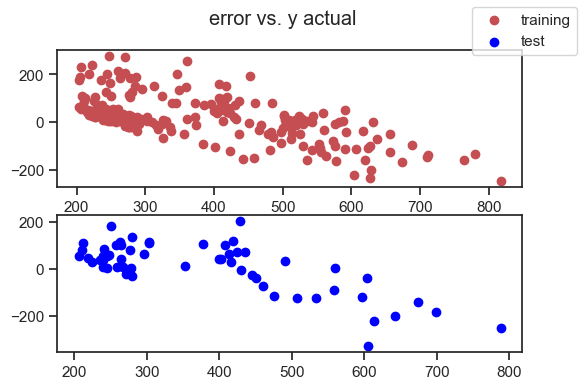

In [128]:
mutls.ModelUtils.plot_model_error(X_train,X_test, y_train, y_test,model)

In [129]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,r2_score
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_train)

C:\Users\Yang\.conda\envs\test_speedcom\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [130]:
r2_score(y_train,y_pred)

0.4004985642335609

In [131]:
mean_absolute_error(y_train,y_pred)

83.99062965332848